### homework3：实现（可以不使用工具包提供的函数）图像的平移，镜像和旋转，以及这三种几何变换的复合。（第三章）

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import cv2 as cv
import math

In [2]:
#图像的平移
def translate(delta_x,delta_y):    
    t=np.array([[1,0,delta_x],[0,1,delta_y]],dtype=np.float32)
    return t

In [3]:
#图像的水平左右镜像
def LRmirro(w):    
    t=np.array([[-1,0,w],[0,1,0]],dtype=np.float32)
    return t

In [4]:
#图像的垂直上下镜像
def UDmirro(h):    
    t=np.array([[1,0,0],[0,-1,h]],dtype=np.float32)
    return t

cs的大小： 1138 * 640


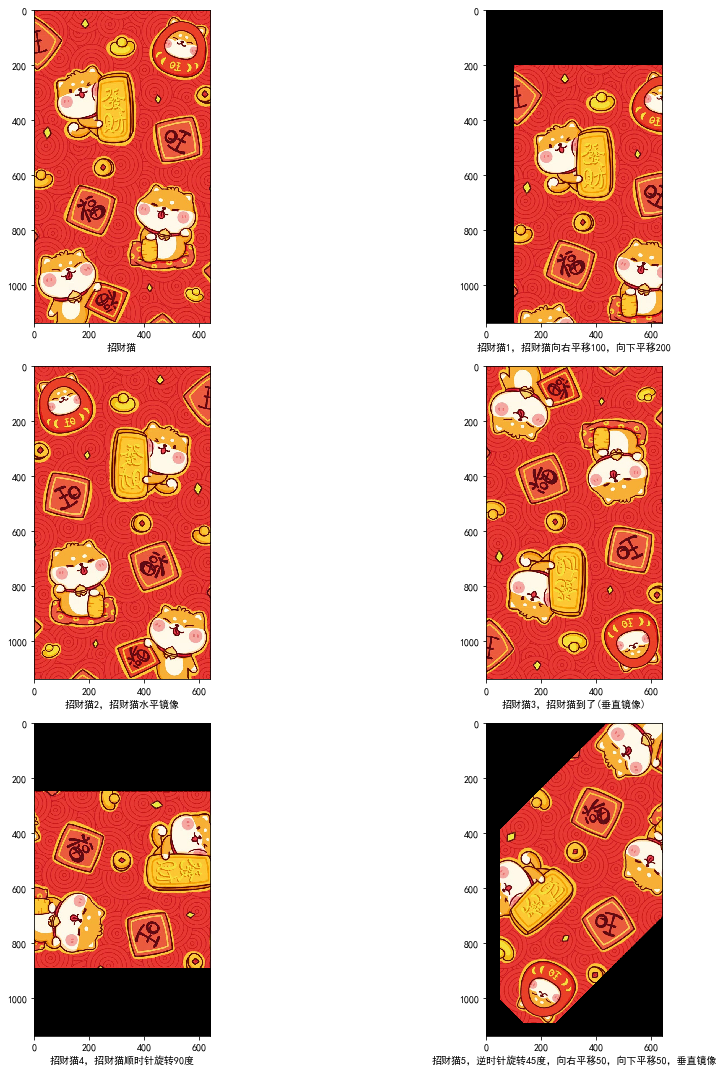

In [6]:
cs=Image.open('./csm.jpg')
cs=np.array(cs)
h,w=cs.shape[:2]
print('cs的大小：',h,'*',w)
#平移：向右平移100，向下平移200
cs1 = cv.warpAffine(cs,translate(100,200),(w,h))
#水平左右镜像
cs2 = cv.warpAffine(cs,LRmirro(w),(w,h))
#垂直上下镜像
cs3 = cv.warpAffine(cs,UDmirro(h),(w,h))
#顺时针旋转90
center = (w/2,h/2)
z= cv.getRotationMatrix2D(center, -90, 1.0)
cs4 = cv.warpAffine(cs,z,(w,h))
#复合：逆时针旋转45度，向右平移50，向下平移50，垂直镜像
m= cv.getRotationMatrix2D(center, 45, 1.0)
cs5 = cv.warpAffine(cs,m,(w,h))
cs5 = cv.warpAffine(cs5,translate(50,50),(w,h))
cs5 = cv.warpAffine(cs5,UDmirro(h),(w,h))


plt.figure(figsize=(15, 15))
plt.rcParams['font.sans-serif']=['SimHei'] #显示中文标签
plt.subplot(321), plt.imshow(cs,cmap='gray', vmin=0,vmax=255),plt.xlabel('招财猫')
plt.subplot(322), plt.imshow(cs1,cmap='gray', vmin=0,vmax=255),plt.xlabel('招财猫1，招财猫向右平移100，向下平移200')
plt.subplot(323), plt.imshow(cs2,cmap='gray', vmin=0,vmax=255),plt.xlabel('招财猫2，招财猫水平镜像')
plt.subplot(324), plt.imshow(cs3,cmap='gray', vmin=0,vmax=255),plt.xlabel('招财猫3，招财猫到了(垂直镜像)')
plt.subplot(325), plt.imshow(cs4,cmap='gray', vmin=0,vmax=255),plt.xlabel('招财猫4，招财猫顺时针旋转90度')
plt.subplot(326), plt.imshow(cs5,cmap='gray', vmin=0,vmax=255),plt.xlabel('招财猫5，逆时针旋转45度，向右平移50，向下平移50，垂直镜像')
plt.tight_layout()
plt.show()